In [2]:
import sys
import numpy as np
import matplotlib
import pandas as pd
import sklearn

print('Python: {}'.format(sys.version))
print('Numpy: {}'.format(np.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))
print('Pandas: {}'.format(pd.__version__))
print('Sklearn: {}'.format(sklearn.__version__))

Python: 3.10.9 | packaged by Anaconda, Inc. | (main, Mar  1 2023, 18:18:15) [MSC v.1916 64 bit (AMD64)]
Numpy: 1.23.5
Matplotlib: 3.7.0
Pandas: 1.5.3
Sklearn: 1.2.1


In [3]:
from sklearn import preprocessing, model_selection
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

In [4]:
#Loading the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
names = ['sample_code_number', 'clump_thickness', 'uniformity_of_cell_size', 'uniformity_of_cell_shape', 'marginal_adhesion', 
         'single_epithelial_cell_size', 'bare_nuclei', 'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class']
df = pd.read_csv(url, names=names)
df

,sample_code_number,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [5]:
#    1. Sample code number            id number
#    2. Clump Thickness               1 - 10
#    3. Uniformity of Cell Size       1 - 10
#    4. Uniformity of Cell Shape      1 - 10
#    5. Marginal Adhesion             1 - 10
#    6. Single Epithelial Cell Size   1 - 10
#    7. Bare Nuclei                   1 - 10
#    8. Bland Chromatin               1 - 10
#    9. Normal Nucleoli               1 - 10
#   10. Mitoses                       1 - 10
#   11. Class:                        (2 for benign, 4 for malignant)
df.replace('?', -99999, inplace=True)
print(df.axes)
df.drop(['sample_code_number'], 1, inplace=True)
print(df.shape)

[RangeIndex(start=0, stop=699, step=1), Index(['sample_code_number', 'clump_thickness', 'uniformity_of_cell_size',
       'uniformity_of_cell_shape', 'marginal_adhesion',
       'single_epithelial_cell_size', 'bare_nuclei', 'bland_chromatin',
       'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')]
(699, 10)


C:\Users\dipikag\AppData\Local\Temp\ipykernel_26580\2363969279.py:14: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['sample_code_number'], 1, inplace=True)


In [6]:
print(df.loc[0])
df.describe()

clump_thickness                5
uniformity_of_cell_size        1
uniformity_of_cell_shape       1
marginal_adhesion              1
single_epithelial_cell_size    2
bare_nuclei                    1
bland_chromatin                3
normal_nucleoli                1
mitoses                        1
class                          2
Name: 0, dtype: object


,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bland_chromatin,normal_nucleoli,mitoses,class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


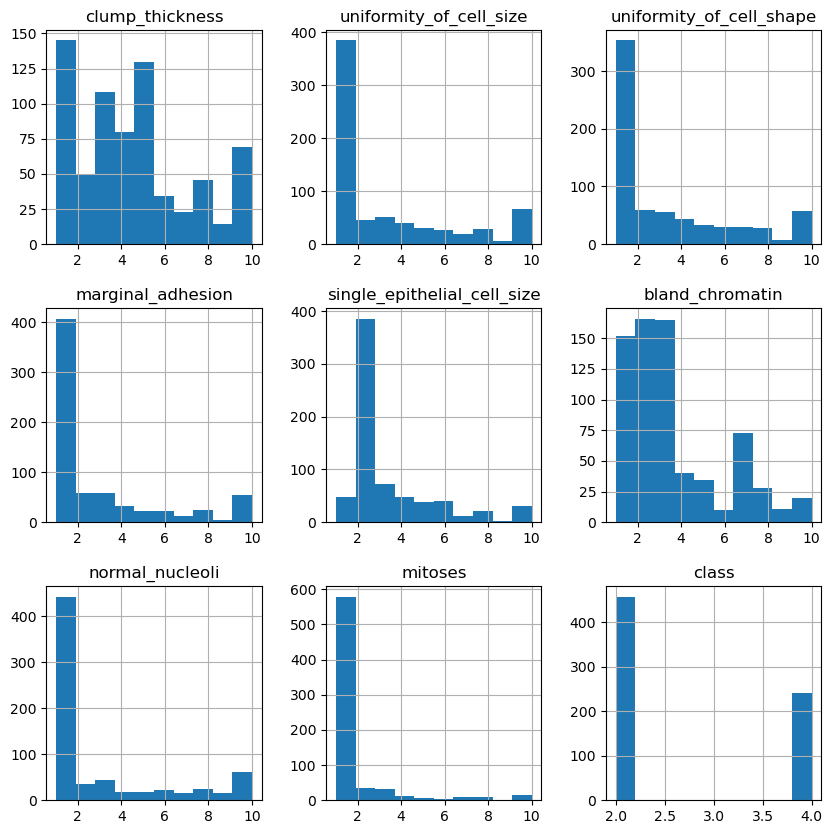

In [7]:
df.hist(figsize = (10,10))
plt.show()

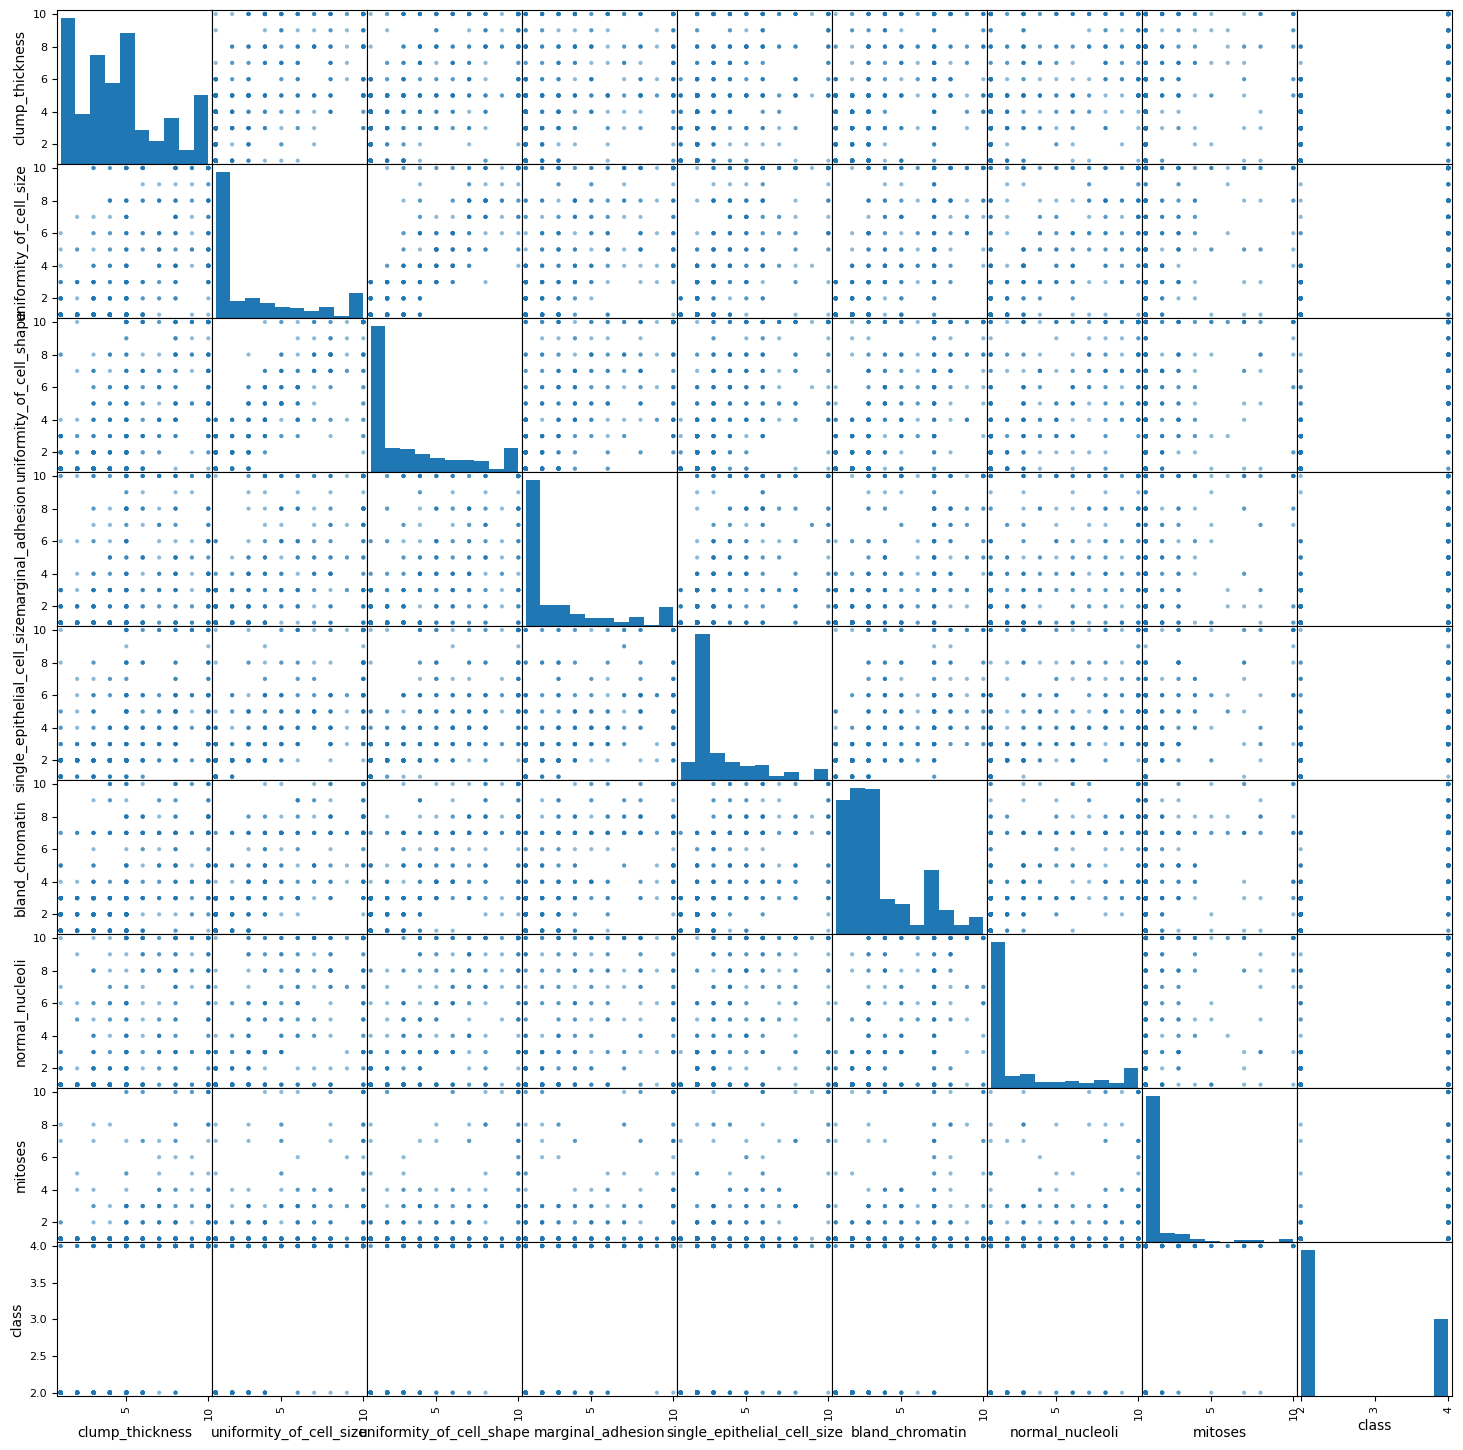

In [8]:
#Scatter Plot
scatter_matrix(df, figsize = (18,18))
plt.show()

In [9]:
#Create X & Y datasets for the training
X = np.array(df.drop(['class'], 1))
Y = np.array(df['class'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

C:\Users\dipikag\AppData\Local\Temp\ipykernel_26580\3015248138.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['class'], 1))


In [10]:
#Specifying testing options
seed = 8
scoring = 'accuracy'

In [11]:
#Define models to train
models = []
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5)))
models.append(('SVM', SVC()))
results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=None)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

KNN: 0.964221 (0.025255)
SVM: 0.649383 (0.048607)


In [12]:
#Make predictions on validation dataset
for name, model in models:
    model.fit(X_train, Y_train)
    predictions = model.predict(X_test)
    print(name)
    print(accuracy_score(Y_test, predictions))
    print(classification_report(Y_test, predictions))

KNN
0.9857142857142858
              precision    recall  f1-score   support

           2       0.99      0.99      0.99        95
           4       0.98      0.98      0.98        45

    accuracy                           0.99       140
   macro avg       0.98      0.98      0.98       140
weighted avg       0.99      0.99      0.99       140

SVM
0.6785714285714286
              precision    recall  f1-score   support

           2       0.68      1.00      0.81        95
           4       0.00      0.00      0.00        45

    accuracy                           0.68       140
   macro avg       0.34      0.50      0.40       140
weighted avg       0.46      0.68      0.55       140



C:\Users\dipikag\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dipikag\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dipikag\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
clf = SVC()
clf.fit(X_train, Y_train)
accuracy = clf.score(X_test, Y_test)
print(accuracy)

example = np.array([[5,1,1,1,2,1,3,1,1]])
example = example.reshape(len(example), -1)
predictions = clf.predict(example)
print(predictions)

0.6785714285714286
[2]
